In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import feature_util

In [8]:
df = pd.read_csv("New Datasets/SmartFall Training.csv")
# df = pd.read_csv("Datasets/SmartFall Testing.csv")
# df = pd.concat([df, pd.read_csv("Datasets/SmartFall Testing.csv")], axis=0).reset_index(drop=True)
df

,ms_accelerometer_x,ms_accelerometer_y,ms_accelerometer_z,outcome
0,1.058105,0.096436,0.113037,0
1,0.718506,0.233887,0.220703,0
2,0.718506,0.233887,0.220703,0
3,0.960205,0.190430,0.051270,0
4,0.960205,0.190430,0.051270,0
...,...,...,...,...
92776,0.713867,0.546631,-0.429443,0
92777,0.715820,0.560303,-0.421875,0
92778,0.715820,0.560303,-0.421875,0
92779,0.736572,0.565918,-0.424316,0


In [9]:
df = df.rename(columns={" ms_accelerometer_x" : "x_ax", " ms_accelerometer_y" : "y_ax", " ms_accelerometer_z" : "z_ax"})

In [10]:
df

,x_ax,y_ax,z_ax,outcome
0,1.058105,0.096436,0.113037,0
1,0.718506,0.233887,0.220703,0
2,0.718506,0.233887,0.220703,0
3,0.960205,0.190430,0.051270,0
4,0.960205,0.190430,0.051270,0
...,...,...,...,...
92776,0.713867,0.546631,-0.429443,0
92777,0.715820,0.560303,-0.421875,0
92778,0.715820,0.560303,-0.421875,0
92779,0.736572,0.565918,-0.424316,0


In [29]:
df.isna().any()

x_ax       False
y_ax       False
z_ax       False
outcome    False
dtype: bool

In [30]:
df.describe()

,x_ax,y_ax,z_ax,outcome
count,91025.000000,91025.000000,91025.000000,91025.000000
mean,0.559185,0.304663,0.201880,0.055205
std,0.644098,0.604859,0.491829,0.228380
min,-7.995117,-7.995117,-8.000000,0.000000
25%,0.151855,0.082764,0.008057,0.000000
50%,0.742920,0.335693,0.192139,0.000000
75%,0.934082,0.595947,0.414795,0.000000
max,7.999023,7.999023,7.978760,1.000000


In [31]:
df['outcome'].unique()

array([0, 1], dtype=int64)

In [32]:
len(df.x_ax) == len(df.y_ax) == len(df.z_ax)

True

In [33]:
data_x = df.drop(['outcome'], axis=1)

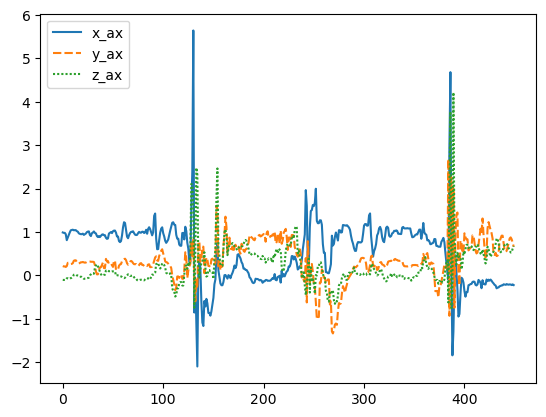

In [34]:
sns.lineplot(data=data_x[0:450])
plt.show()

In [35]:
# import plotly.express as px

# fig = px.line(df, x=range(0,len(df.x_ax)), y=df.columns[0:3], title='Example of a fall')
# # fig = px.line(data, x=range(0,125), y=data.columns[0:3], title='Example of a fall')
# fig.show()

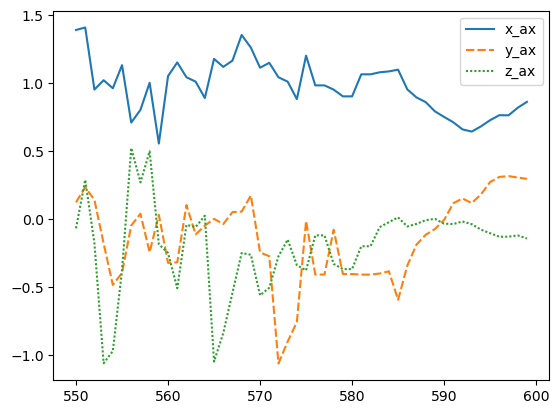

In [36]:
sns.lineplot(data=data_x[550:600])
plt.show()

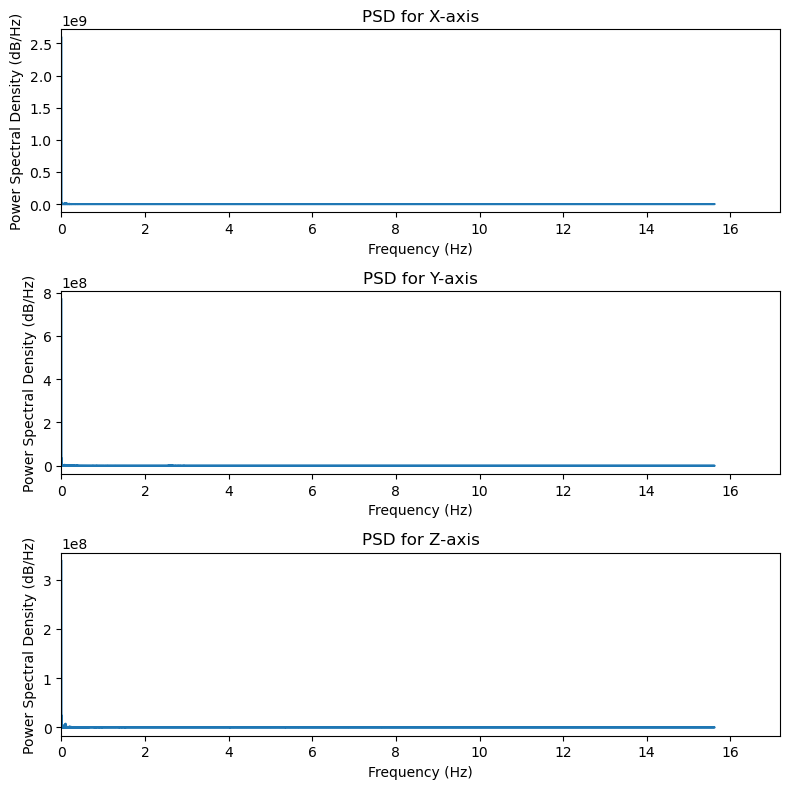

In [37]:
# Set the sampling rate and calculate the duration of the signal
fs = 31.25
T = 1 / fs

# Get the length of the signal
n = len(data_x)

# Calculate the FFT for all axes using np.fft.fft
fft_x = np.fft.fft(data_x['x_ax'])
fft_y = np.fft.fft(data_x['y_ax'])
fft_z = np.fft.fft(data_x['z_ax'])

# Calculate the frequency bins for the FFT
freqs = np.fft.fftfreq(n, T)

# Take the absolute value of the FFT results
psd_x = np.abs(fft_x)**2
psd_y = np.abs(fft_y)**2
psd_z = np.abs(fft_z)**2

# Plot the PSD for all axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))

ax1.plot(freqs, psd_x)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Power Spectral Density (dB/Hz)')
ax1.set_title('PSD for X-axis')
ax1.set_xlim(0)

ax2.plot(freqs, psd_y)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Power Spectral Density (dB/Hz)')
ax2.set_title('PSD for Y-axis')
ax2.set_xlim(0)

ax3.plot(freqs, psd_z)
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Power Spectral Density (dB/Hz)')
ax3.set_title('PSD for Z-axis')
ax3.set_xlim(0)

plt.tight_layout()
plt.show()

In [38]:
df_filtered = feature_util.apply_filter(data_x, low_cutoff = 5)
df_filtered

low cutoff 5 Hz


,x_ax,y_ax,z_ax
0,0.986366,0.210945,-0.105951
1,0.974849,0.196761,-0.108471
2,0.947927,0.194073,-0.105326
3,0.908358,0.207988,-0.095777
4,0.877867,0.233421,-0.084629
...,...,...,...
91020,0.855340,0.367065,0.089292
91021,0.750066,0.405776,0.084742
91022,0.692327,0.453963,0.054610
91023,0.705525,0.527850,-0.023513


In [39]:
df_filtered_standardised = feature_util.standardise_df(df_filtered)
df_filtered_standardised

,x_ax,y_ax,z_ax
0,0.728950,-0.176528,-0.723244
1,0.709298,-0.203246,-0.729165
2,0.663358,-0.208310,-0.721777
3,0.595836,-0.182098,-0.699340
4,0.543806,-0.134192,-0.673149
...,...,...,...
91020,0.505366,0.117541,-0.264522
91021,0.325723,0.190458,-0.275213
91022,0.227197,0.281224,-0.346009
91023,0.249718,0.420398,-0.529558


In [40]:
df_filtered_normalised = feature_util.normalise_df(df_filtered)
df_filtered_normalised

Index(['x_ax', 'y_ax', 'z_ax'], dtype='object')


,x_ax,y_ax,z_ax
0,0.326652,0.421153,0.538876
1,0.325553,0.419770,0.538652
2,0.322985,0.419508,0.538931
3,0.319210,0.420864,0.539779
4,0.316301,0.423343,0.540768
...,...,...,...
91020,0.314151,0.436371,0.556205
91021,0.304108,0.440144,0.555801
91022,0.298599,0.444842,0.553127
91023,0.299858,0.452044,0.546193


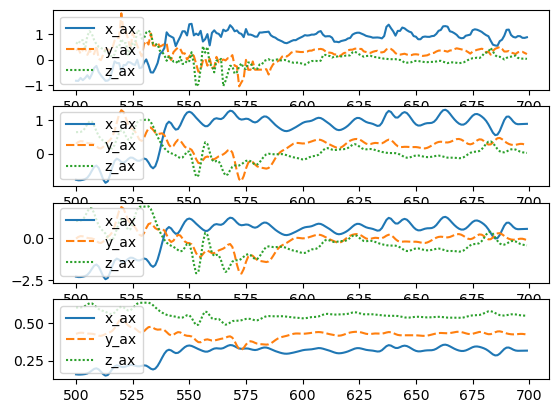

In [41]:
fig, axs = plt.subplots(nrows=4)

sns.lineplot(data=data_x[500:700], ax=axs[0])
sns.lineplot(data=df_filtered[500:700], ax=axs[1])
sns.lineplot(data=df_filtered_standardised[500:700], ax=axs[2])
sns.lineplot(data=df_filtered_normalised[500:700], ax=axs[3])
plt.show()

In [42]:
df_filtered['outcome'] = df['outcome']
df_filtered_normalised['outcome'] = df['outcome']
df_filtered_standardised['outcome'] = df['outcome']
# df_filtered.to_csv("Datasets/full_filtered_smartfall_dataset.csv")
# df_filtered.to_csv("Datasets/filtered_smartfall_training_dataset.csv")
# df_filtered.to_csv("Datasets/filtered_smartfall_testing_dataset.csv")

In [43]:
# df.to_csv("Datasets/full_processed_smartfall_dataset.csv")
# df.to_csv("Datasets/processed_smartfall_training_dataset.csv")
# df_filtered.to_csv("New Datasets/filtered_smartfall_training_dataset.csv")
# df_filtered_normalised.to_csv("New Datasets/filtered_normalised_smartfall_training_dataset.csv")
# df_filtered_standardised.to_csv("New Datasets/filtered_standardised_smartfall_training_dataset.csv")


# df_filtered.to_csv("New Datasets/filtered_smartfall_testing_dataset.csv")
# df_filtered_normalised.to_csv("New Datasets/filtered_normalised_smartfall_testing_dataset.csv")
# df_filtered_standardised.to_csv("New Datasets/filtered_standardised_smartfall_testing_dataset.csv")